# Logistic Regression
### Aim: To classify whether a person has heart disease or not.
### Dataset: Heart Disease
### Source: Kaggle


In [ ]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Loading the data
data =pd.read_csv("heart.csv")
data.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


Data Preprocessing

In [ ]:
## Descriptions of the data
print(data.shape)
print(data.info())

(4238, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB
No

In [ ]:
# Detecting and handling Null values and duplicate values
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
data.isna().sum()*100/len(data)

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(3656, 16)

In [ ]:
data.duplicated().sum()

0

* The dataset consists of 4238 records and 16 features. All the 16 features are of numerical type. Since the data consists of less than 20% of missing values in columns education, columnMeds, CigsPerDay,totChol, BMI, Heart rate and Glucose we have dropped these records. And now our dataset consists of 3656 records.

* TenYearCHD is the Dependent Variable, consisting of Classes 0 - No Heart Diseases and 1- Heart Disease. Rest of the Varibles are Independent.

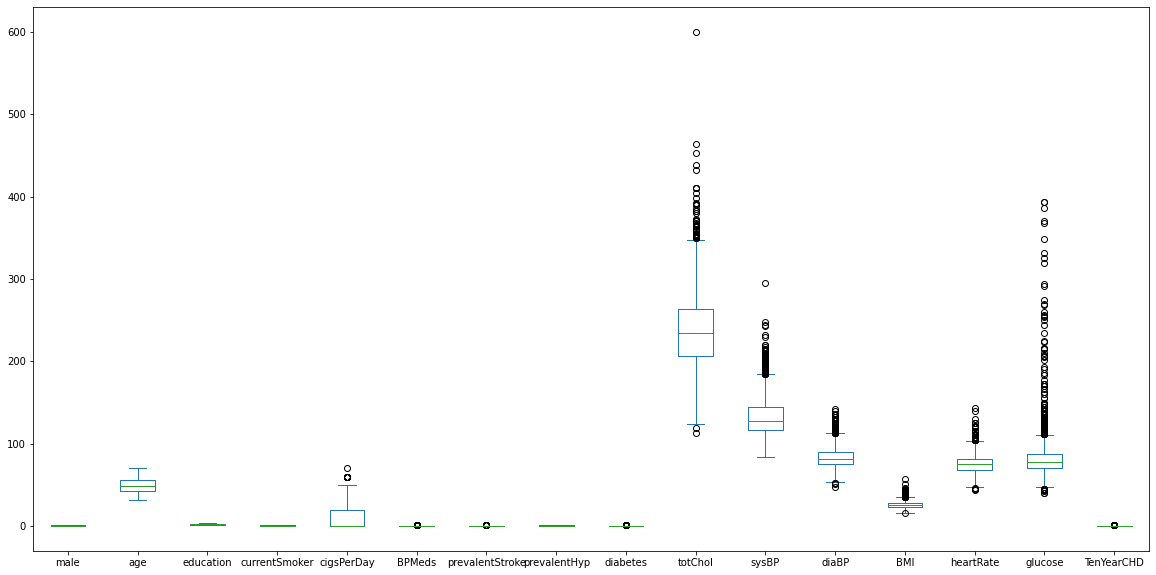

In [ ]:
# Inspecting for Outliers
data.plot(kind="box", figsize=(20,10))

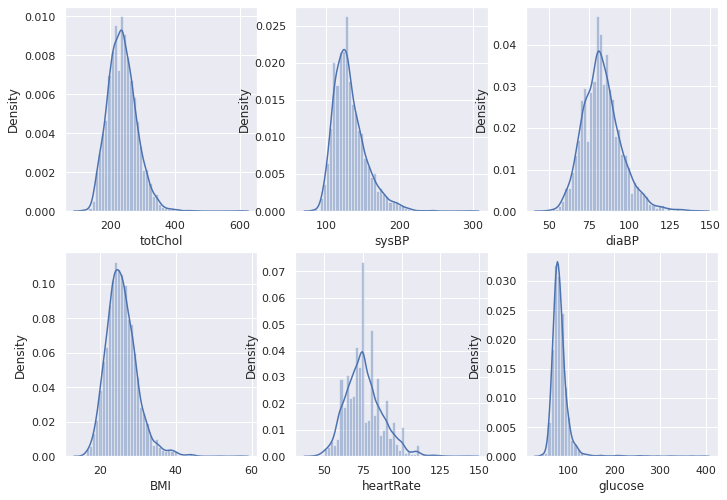

In [ ]:
# Distributions of the features containing outliers
from scipy.stats import skew
count=1
for i in data[["totChol","sysBP","diaBP","BMI","heartRate","glucose"]]:
  #fig,ax = plt.subplots(figsize=(10,5))
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  plt.subplot(2,3,count)
  sns.distplot(data[i])
  count+=1


In [ ]:
# Capping the outliers using quartiles
def quartiles(data):
  q1=data.quantile(0.25)
  q3=data.quantile(0.75)
  IQR=q3-q1
  upper = q3 + 1.5*IQR
  lower = q1 - 1.5*IQR
  return upper,lower


In [ ]:

df = data.copy()
def rem_outliers(i,upper,lower):
   df[i]=np.where(df[i]>upper,upper,
         np.where(df[i]<lower,lower,
        df[i]))



In [ ]:
col = ["totChol","sysBP","diaBP","BMI","heartRate","glucose"]
for i in col:
  a,b = quartiles(data[i])
  rem_outliers(i,a,b)

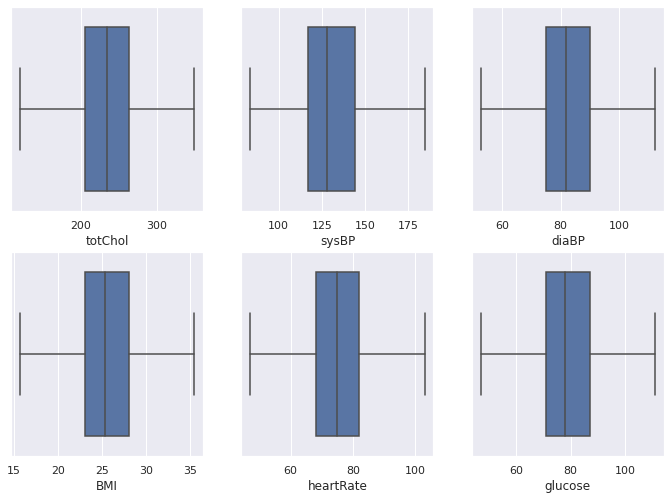

In [ ]:
# Boxplot after removing the outliers
count=1
for i in df[["totChol","sysBP","diaBP","BMI","heartRate","glucose"]]:
  #fig,ax = plt.subplots(figsize=(10,5))
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  plt.subplot(2,3,count)
  sns.boxplot(df[i])
  count+=1

* As we can see that totChol,sysBP, diaBP, BMI, heartrate and glucose contained outliers, we have removed them using the Quartiles Method. Since all these variables had a skewed distribution, using Quartiles to cap the outliers will be suitable.

In [ ]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [ ]:
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


EDA

0    84.76477
1    15.23523
Name: TenYearCHD, dtype: float64


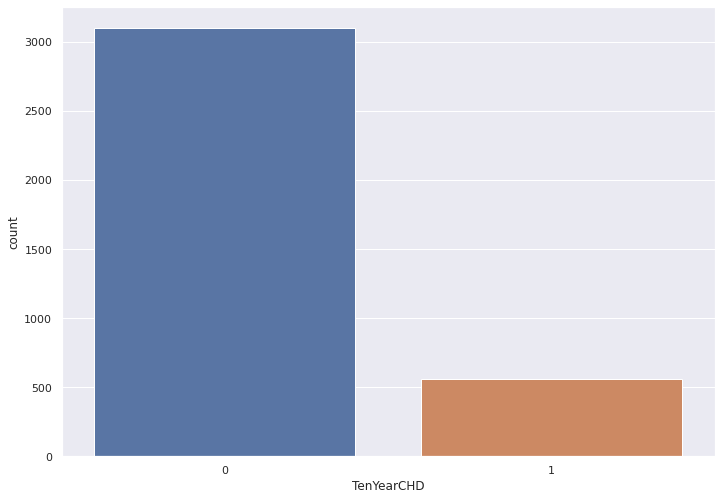

In [ ]:
# Percentage of people Diabetic and Non-Diabetic
print(df["TenYearCHD"].value_counts()/len(df)*100)
sns.countplot(x = "TenYearCHD", data=df)

In 3656 records, 84% of the patients had no heart disease and 15 Were diagnosed has heart diseased.




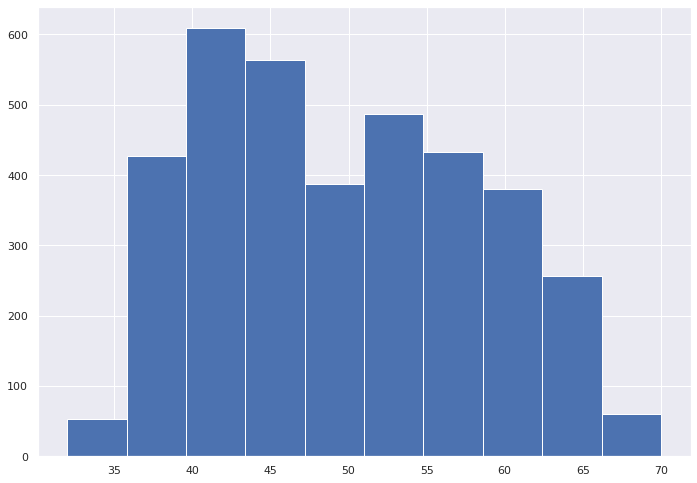

In [ ]:
#Distribution of Age
df.age.hist()

* The age of the people diagnosed was from 30to 70 years of age

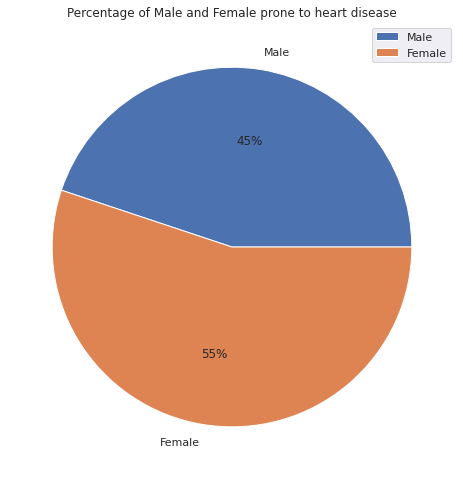

In [ ]:
# Pie Chart to represent the percentage of Diabetics in MAle and Female
Male= df[(df["male"]==0) & (df["TenYearCHD"] ==1)]
Fem = df[(df["male"]==1) & (df["TenYearCHD"] ==1)]

EA = [Male["TenYearCHD"].count(), Fem["TenYearCHD"].count()]
plt.pie(EA,  autopct ="%1.0f%%" , labels = ["Male", "Female"])
plt.title("Percentage of Male and Female prone to heart disease")
plt.legend()
plt.show()

* 45% and 55% of male  and female tested respectively, were diagnised as Heart diseased.

Fitting the model

In [ ]:
x = df.iloc[:,0:15]
y = df.iloc[:,15]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train_,y_test =train_test_split(x,y,test_size =0.2, random_state =0)


In [ ]:
from sklearn.preprocessing import StandardScaler
st_sc = StandardScaler()
x_train = st_sc.fit_transform(x_train)
x_test =st_sc.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train,y_train_)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
r2_score = classifier.score(x_test,y_test)
print(r2_score*100,"%")

85.10928961748634 %


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
confusion_matrix(y_test,y_pred)


array([[616,   7],
       [102,   7]])

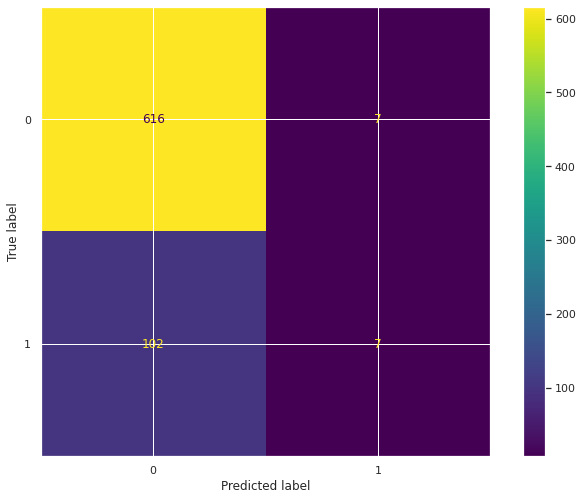

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, x_test,y_test)

 7 persons having heart diseases were correctly classified by the model as diseased.7 of the non -heart diseased patients were incorrectly classified as belonging to the positive class(heart diseased) by the model. 102 patients having heart diseased were predicted has not having the heart disease. . 616 non heart diseased patients were predicted as non heart-diseased.

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       623
           1       0.50      0.06      0.11       109

    accuracy                           0.85       732
   macro avg       0.68      0.53      0.52       732
weighted avg       0.80      0.85      0.80       732



Out of all non heart disease classes that have been predicted correctly by the model, 86% of  them were actually true.  Out of total positive classes of non heart disease,our model was able to predict all the non heart diseases classes correctly with 99% accuracy. The model is able to classify the Non heart disease class with an accuracy of 92%.

But the heart disease class that have been predicted correctly by the model, 50% of them were actually True. Out of The total of heart diseased, our model was able to predict the heart disease classes with only 6% accuaracy. The F1-Score is pretty low, The model isnt able to classify the heart diseases class very well.
The model is able to classify the two classes with an accuracy of 85%

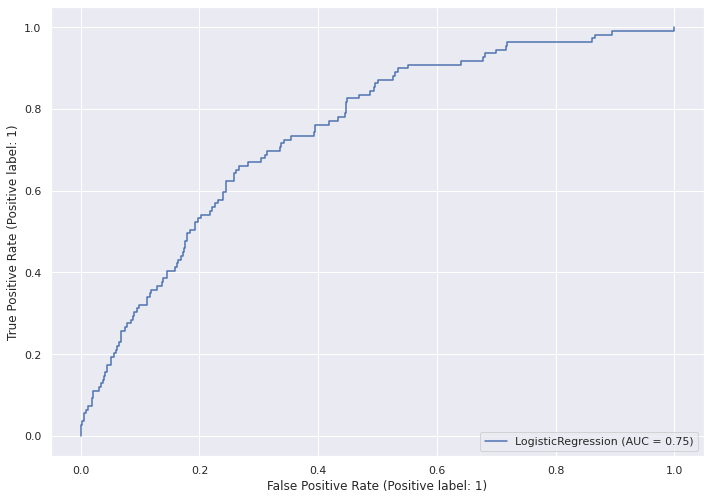

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, x_test,y_test)

As the AUC score is 0.75, we can conclude that the model is moderate in distinguishing the two classess. Higher the AUC, the better will be the model in predicting the clasess. There is a high chance that the classifier will be able to distinguish between the heart diseased and not diseases.

# Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters_lr = [{'penalty':['l1','l2',"elasticnet"],'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
grid_search_lr = GridSearchCV(estimator = classifier,param_grid = parameters_lr,scoring = 'accuracy',cv = 10,n_jobs = -1)
grid_search_lr.fit(x_train,y_train_)
best_accuracy_lr = grid_search_lr.best_score_
best_paramaeter_lr = grid_search_lr.best_params_
print("Best Accuracy of LR: {:.2f} %".format(best_accuracy_lr.mean()*100))
print("Best Parameter of LR:", best_paramaeter_lr)

Best Accuracy of LR: 85.09 %
Best Parameter of LR: {'C': 0.1, 'penalty': 'l2'}


The optimal value for penalty and C are l2 and 0.1 respectively which gives an accuracy of 85%.

85.10928961748634 %


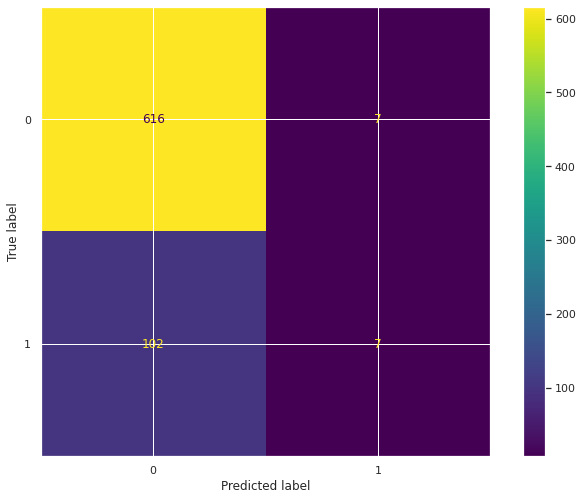

In [ ]:
classifierT = LogisticRegression(random_state = 0, penalty="l2", C=0.1)
classifierT.fit(x_train,y_train_)
y_predT = classifierT.predict(x_test)
r2_scoreT = classifierT.score(x_test,y_test)
print(r2_scoreT*100,"%")
plot_confusion_matrix(classifier, x_test,y_test)

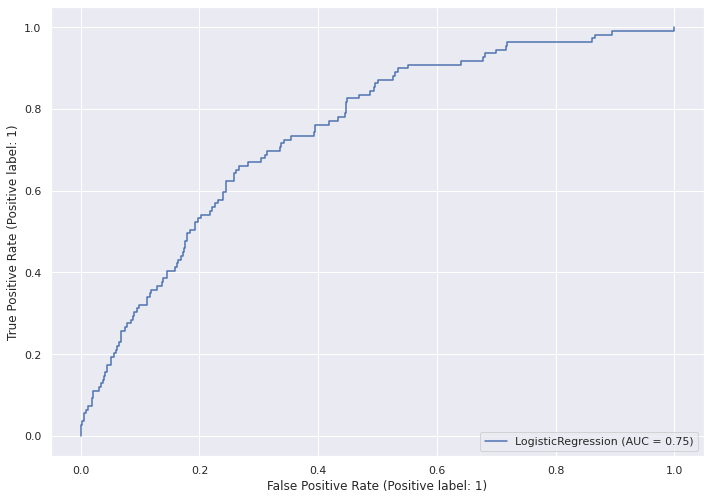

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, x_test,y_test)

The AUC score remains the same that is 0.75, we can conclude that the model even after tuning the hyper parameters, it is moderate in distinguishing the two classess.